In [25]:
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
model2 = keras.models.load_model('model_vgg16_11.model')

In [24]:
image = load_img('./tree_pics/cedar/cedar_1.jpg', target_size =(224,224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image, mode='tf')
yhat = model2.predict(image)
yhat

array([[4.7506865e-06, 9.9739677e-01, 1.5145015e-06, 4.2233962e-05,
        4.4325865e-05, 1.6462477e-04, 2.3457629e-03]], dtype=float32)

In [36]:
directory = './tree_pics/'

for subdir, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith('.DS_Store'):
            continue
        else:
            image = load_img(subdir+'/'+file, target_size=(224,224))
            image = img_to_array(image)
            image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
            image = preprocess_input(image, mode='tf')
            yhat = model2.predict_classes(image)
            print(yhat, file)

[0] alder_2.jpg
[0] alder_3.jpg
[0] alder_1.jpg
[0] alder_4.jpg
[0] alder_5.jpg
[0] alder_6.jpg
[4] maple_1.jpg
[4] maple_3.jpg
[4] maple_2.jpg
[4] maple_scaled_2.jpeg
[6] pine_1.jpg
[6] pine_2.jpg
[6] pine_3.jpg
[6] pine_4.jpg
[6] pine_5.jpg
[2] doug_fir_1.jpg
[2] doug_fir_2.jpg
[1] cedar_2.jpg
[1] cedar_3.jpg
[1] cedar_1.jpg
[1] cedar_4.jpg


In [ ]:
def test_picture(image_path):
    test_datagen = ImageDataGenerator(rescale=1./255)
    load_img()
    test_gen = test_datagen.flow

In [17]:
path = './tree_pics/'
test_datagen = ImageDataGenerator(rescale=1./255)
test_batch = 5
test_gen = test_datagen.flow_from_directory(path, 
                            target_size=(224,224),
                            batch_size = test_batch,
                            class_mode='categorical',
                            shuffle=False)

Found 21 images belonging to 7 classes.


In [7]:
test_file = test_gen.filenames
test_truth = test_gen.classes
test_label = test_gen.class_indices
test_indexlabel = dict((value,key) for key, value in test_label.items())

In [8]:
test_pred = model2.predict_generator(test_gen, steps=test_gen.samples/test_gen.batch_size, verbose=1)
test_pred_class = np.argmax(test_pred, axis=1)
test_error = np.where(test_pred_class != test_truth)[0]
print('Number of errors = {}/{}'.format(len(test_error), test_gen.samples))

5/4 [===================================] - 8s 2s/step
Number of errors = 1/21


In [9]:
test_indexlabel

{0: 'alder',
 1: 'cedar',
 2: 'dougfir',
 3: 'fir',
 4: 'maple',
 5: 'oak',
 6: 'pine'}

dougfir/doug_fir_2.jpg


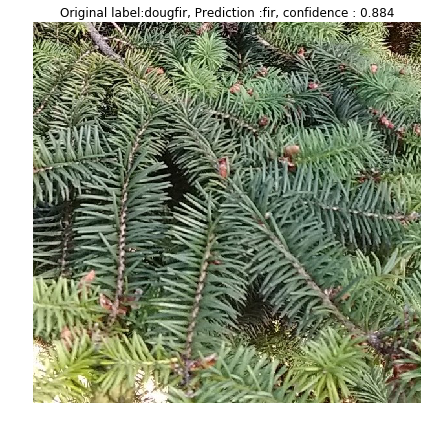

In [10]:
for i in range(len(test_error)):
    test_predclass = np.argmax(test_pred[test_error[i]])
    test_predlabel = test_indexlabel[test_predclass]
    
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        test_file[test_error[i]].split('/')[0],
        test_predlabel,
        test_pred[test_error[i]][test_predclass])
    
    test_original = load_img('{}/{}'.format(path,test_file[test_error[i]]))
    print(test_file[test_error[i]])
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(test_original)
    plt.show()